#### URL for the dataset

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip

--2025-03-29 03:26:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.08s   

2025-03-29 03:26:59 (5.58 MB/s) - ‘bank-additional.zip’ saved [444572/444572]



#### Unzipping to a folder. It is a good idea to apply the -o and -q when unzipping to quiet the process and overwrite any existing folders.

In [ ]:
!unzip -o -q bank-additional.zip

### Import the libraries necessary to use

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

#### precision parameter equal to 2 to display two decimal signs (instead of 6 as default).

In [ ]:
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

### DataSet preparation

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
# Transform to categorical data
col_cat = list(df.select_dtypes(include=['object']).columns)
df.loc[:, col_cat] = df[col_cat].astype('category')
# Create DataSets
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column
# Encoding
col_cat.pop()
oe = OrdinalEncoder()
oe.fit(X[col_cat])
X_cat_enc = oe.transform(X[col_cat])
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
# Normalization
col_num = list(df.select_dtypes(include =['int64', 'float64']).columns)
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
# Encoding target
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name
# Remove correlated fields
col = list(x_enc.columns)
col.remove('emp.var.rate')
col.remove('nr.employed')
x_enc = x_enc[col]
# Feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_enc.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
x_enc = x_enc[list(featureScores.nlargest(10,'Score')['Specs'])]
print(x_enc)
print(y_enc)

       euribor3m  contact  previous  duration  default  education  pdays  \
0           0.96     1.00      0.00      0.05     0.00       0.00   1.00   
1           0.96     1.00      0.00      0.03     1.00       3.00   1.00   
2           0.96     1.00      0.00      0.05     0.00       3.00   1.00   
3           0.96     1.00      0.00      0.03     0.00       1.00   1.00   
4           0.96     1.00      0.00      0.06     0.00       3.00   1.00   
...          ...      ...       ...       ...      ...        ...    ...   
41183       0.09     0.00      0.00      0.07     0.00       5.00   1.00   
41184       0.09     0.00      0.00      0.08     0.00       5.00   1.00   
41185       0.09     0.00      0.00      0.04     0.00       6.00   1.00   
41186       0.09     0.00      0.00      0.09     0.00       5.00   1.00   
41187       0.09     0.00      0.14      0.05     0.00       5.00   1.00   

       poutcome  job  cons.price.idx  
0          1.00 3.00            0.70  
1        

### Classical classification models



In [ ]:
#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
clf = LogisticRegression()
scores = cross_val_score(clf, x_enc, y_enc, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Logistic Regression'))

Accuracy: 0.87 (+/- 0.06) [Logistic Regression]


In [ ]:
clf_name = ['Logistic Regression']
clf_acc = [scores.mean()]

As you can see, accuracy is not bad.

Let's try to use another classificators and compare thair accuracy.

In [ ]:
clf1 = LogisticRegression(random_state=1)
clf2 = QuadraticDiscriminantAnalysis()
clf3 = GaussianNB()
clf4 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf5 = AdaBoostClassifier()

for clf, label in zip([clf1, clf2, clf3, clf4, clf5], ['Logistic Regression', 'Quadratic Discriminant Analysis', 'naive Bayes', 'Random Forest', 'Ada Boost']):
     scores = cross_val_score(clf, x_enc, y_enc, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.06) [Logistic Regression]
Accuracy: 0.83 (+/- 0.13) [Quadratic Discriminant Analysis]
Accuracy: 0.80 (+/- 0.15) [naive Bayes]
Accuracy: 0.66 (+/- 0.27) [Random Forest]
Accuracy: 0.67 (+/- 0.29) [Ada Boost]


### Ensemble of classical classification models

In [ ]:
eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('rfc', clf4), ('abc', clf5)],
     voting='hard')
scores = cross_val_score(eclf, x_enc, y_enc, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Hard Voiting Ensemble'))

Accuracy: 0.81 (+/- 0.15) [Hard Voiting Ensemble]


In [ ]:
clf_name.append('Hard Voiting Ensemble')
clf_acc.append(scores.mean())

In [ ]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('rfc', clf4), ('abc', clf5)],
     voting='soft', weights=[0.87, 0.83, 0.80, 0.74, 0.61 ])

scores = cross_val_score(eclf, x_enc, y_enc, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Soft Voiting Ensemble'))

Accuracy: 0.82 (+/- 0.15) [Soft Voiting Ensemble]


In [ ]:
clf_name.append('Soft Voiting Ensemble')
clf_acc.append(scores.mean())

### Analysis of errors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33, random_state=1)
eclf.fit(X_train, y_train)
yhat = eclf.predict(X_test)

In [ ]:
scores_train = eclf.score(X_train, y_train)
scores_test = eclf.score(X_test, y_test)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))
y_pred = eclf.predict(X_test)  # Get model predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

Training DataSet accuracy:  89.8% Test DataSet accuracy:  89.9%
[[11615   434]
 [  940   604]]


### Classification with Keras

In [ ]:
!pip install scikeras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=10, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Output layer with 2 units for 2 classes
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model




In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)
# Convert y_train to one-hot encoding using to_categorical
history = estimator.fit(X_train, to_categorical(y_train))

Epoch 1/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8721 - loss: 0.3470
Epoch 2/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9059 - loss: 0.2343
Epoch 3/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9084 - loss: 0.2209
Epoch 4/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9086 - loss: 0.2191
Epoch 5/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9062 - loss: 0.2198
Epoch 6/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9048 - loss: 0.2136
Epoch 7/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9120 - loss: 0.2041
Epoch 8/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9080 - loss: 0.2085
Epoch 9/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9045 - loss: 0.2087
Epoch 10/10
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9091 - loss: 0.2063


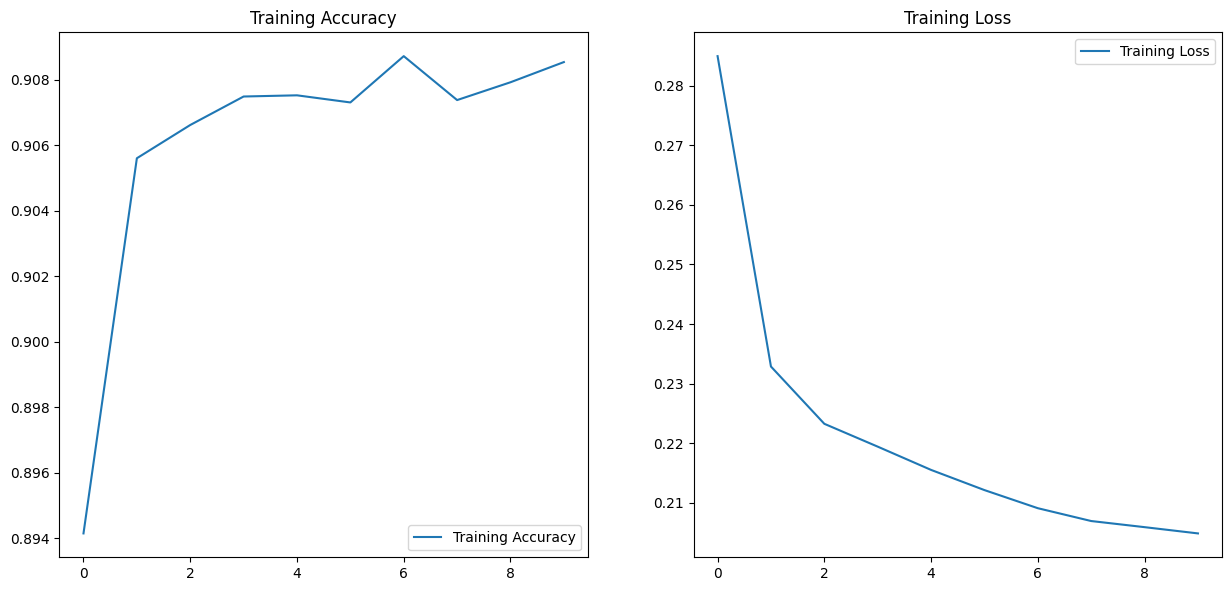

In [ ]:
acc = estimator.history_['accuracy']
loss = estimator.history_['loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
yhat = estimator.predict(X_test)
# Convert yhat to binary labels
yhat = np.argmax(yhat, axis=1) # Get the index of the highest probability
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy))

2719/2719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Accuracy: 0.91


In [ ]:
#clf_name.append('KerasClassifier')
#clf_acc.append(accuracy)

### Own Keras ensemble classificator

In [ ]:
n_members = 3
members = list()
for i in range(n_members):
    # fit model
    model = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)
    # Fit the model using the categorical target variable
    model.fit(X_train, y_train_categorical)
    members.append(model)

NameError: name 'y_train_categorical' is not defined

In [ ]:
# evaluate standalone models on test dataset
from sklearn.metrics import accuracy_score
for model in members:
    # Predict probabilities and then select the class with highest probability
    yhat_prob = model.predict(X_test)
    yhat = np.argmax(yhat_prob, axis=1)  # Get class labels (0 or 1)
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %.4f' % (accuracy))

In [ ]:
# create stacked model input dataset as outputs from the ensemble
from numpy import dstack
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1] * stackX.shape[2]))
    return stackX

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model

In [ ]:
# fit stacked model using the ensemble
model = fit_stacked_model(members, X_test, y_test)

In [ ]:
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

In [ ]:
yhat = stacked_prediction(members, model, X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.4f' % (accuracy))

In [ ]:
clf_name.append('LinearKerasEnsemble')
clf_acc.append(accuracy)

In [ ]:
df = pd.DataFrame({'Classificators':clf_name, 'Accuracy':clf_acc})
ax = df.plot.bar(x='Classificators', y='Accuracy', rot=45)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
df